In [1]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization

In [2]:
# Load the cleaned file
telcom = pd.read_csv("clean_df.csv")

In [3]:
telcom.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [4]:
telcom = telcom.drop('Unnamed: 0', axis = 1)

In [5]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [7]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [8]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols)

In [9]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
7028,2234-XADUH,0,0,1,1,72,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
7029,4801-JZAZL,0,0,1,1,11,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
7030,8361-LTMKD,1,1,1,0,4,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [10]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [11]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [12]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [13]:
telcom.shape

(7032, 35)

# What is the purpose of the above code?

Scaling is used to bring all the features present in the data on to a similar scale . This is done so that some of the features don't start impacting the prediction value more than the others. A feature with higher scale values will impact the outcome more that features with lower scale values. Scaling brings the higher scale value to a standard range where each feature becomes equally contributing towards the prediction of the outcome

Standard scaler is used to counter the outliers. In other scalers (like  min max) all values are considered(even outliers) and they tend to change the range of the values towards higher values (impact of bigger outliers), using standard scaler will help the data to be scaled using a normalized distribution and hence range everything between -3SD and +3SD from the mean, thus lowering the impact of the outliers.    

In [14]:
# Variable Summary
summary = telcom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,5.046928e-01,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,1.624005e-01,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,4.825085e-01,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,2.984926e-01,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,9.032992e-01,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,2.865472e-01,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,3.448521e-01,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,3.438567e-01,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,2.901024e-01,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7032.0,3.843857e-01,0.486484,0.000000,0.000000,0.000000,1.000000,1.000000


In [15]:
# To make it look nice we can do some additional stuff if needed
summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [16]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [17]:
#convert to array
corr_array  = np.array(correlation)

In [18]:
correlation

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,...,0.000844,0.013199,-0.001050,-0.000649,-0.010516,-0.004319,0.016279,0.005285,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,...,0.171322,-0.152987,-0.027713,0.001860,0.020383,0.014186,-0.002407,0.015683,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,...,-0.083207,-0.096948,-0.305061,-0.048481,0.028468,0.105341,0.280353,0.381912,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,...,-0.149274,0.056448,-0.145379,-0.001459,0.024645,0.031419,0.118090,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,...,0.002747,-0.004463,-0.006950,0.012307,-0.014778,-0.009750,0.020516,0.007877,0.248033,0.113008
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,...,-0.112295,-0.079918,-0.242409,-0.055662,0.007695,0.071663,0.263228,0.328297,0.296447,0.412619
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,...,-0.000364,-0.174075,-0.267366,-0.084081,0.023085,0.099192,0.278788,0.361138,0.441529,0.510100
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,...,-0.003308,-0.187325,-0.273920,-0.077332,0.044972,0.076854,0.275537,0.361520,0.482607,0.522881
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,...,-0.114807,-0.084631,-0.238628,-0.072019,0.022137,0.062710,0.265396,0.325288,0.338301,0.432868
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,-0.021383,0.175514,0.281601,0.389924,0.277549,1.000000,...,0.144747,-0.247712,-0.220761,-0.050234,0.028829,0.087969,0.198150,0.280264,0.629668,0.515709


In [19]:
corr_array

array([[ 1.00000000e+00, -1.81939061e-03, -1.37905132e-03, ...,
         5.28537187e-03, -1.37793273e-02,  4.78395084e-05],
       [-1.81939061e-03,  1.00000000e+00,  1.69566145e-02, ...,
         1.56834799e-02,  2.19874230e-01,  1.02410605e-01],
       [-1.37905132e-03,  1.69566145e-02,  1.00000000e+00, ...,
         3.81911509e-01,  9.78249719e-02,  3.19072363e-01],
       ...,
       [ 5.28537187e-03,  1.56834799e-02,  3.81911509e-01, ...,
         1.00000000e+00,  2.46861767e-01,  8.25880461e-01],
       [-1.37793273e-02,  2.19874230e-01,  9.78249719e-02, ...,
         2.46861767e-01,  1.00000000e+00,  6.51064803e-01],
       [ 4.78395084e-05,  1.02410605e-01,  3.19072363e-01, ...,
         8.25880461e-01,  6.51064803e-01,  1.00000000e+00]])

In [20]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

# Q. What do you observe?

Correlation matrix is very similar to the one we got in Part 1 - but here we got relation between the categorial features also. Also scaling the data does not bring any relational changes between the variables. scaling and data prep should help in better prediction but not change the correlation between the variables. 

# Model Building (We will build Decision Tree and Logistics Regression models)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

In [22]:
# Separate the features from the class label and split the dataset into training and testing sets
X=telcom.drop(["Churn"], axis=1)
y=telcom["Churn"]
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [23]:
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)

In [24]:
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

# Q. What is the purpose of random_state parameter?

Random State Parameter is used to split the data for training in a better and random way - just imagine if your train data is split in such a way that it consider only one type of category in the data then what impact it will have on your predictions (it will create a bias in the outcome), so a random state is used which sets a random starting point and split in the data (data for training is split so that each category is considered while training the set) 

# Logistics Regression

In [25]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [26]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [27]:
classifier.coef_

array([[-0.08956551,  0.21558038,  0.00261811, -0.13203196, -0.17862416,
        -0.42724959, -0.18892614, -0.00870682, -0.31126585,  0.17963667,
         0.25754656,  0.3679981 , -0.27665325,  0.18276997,  0.09802909,
        -0.04404421,  0.65239273, -0.60420271,  0.72158875,  0.02814553,
        -0.74558846, -0.009087  , -0.13951838,  0.22585844, -0.07310724,
        -0.25144936, -0.65052999, -0.18548879,  0.54855237,  0.54306159,
        -1.37383702,  0.1881799 ,  0.24841314]])

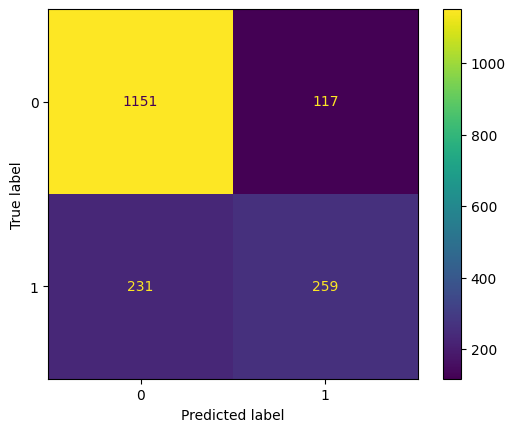

Test Data Accuracy: 0.8020


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
cm = confusion_matrix(Y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

Q. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.

Accuracy Score refers to the prediction of sum of  True Negative and True Positive predictions out of the total, which refers to the prediction capability of the algorithm.   A score of 0.8020 refers to that the algorithm predicts ~80% of the data to accurate churning/non churnings. as its a Telecom data a prediction model with 80% accuracy can be considered pretty good (if it would have been other industry then this score might have been not that good) 

accuracy: 0.8020477815699659
precision score: 0.6888297872340425
recall score: 0.5285714285714286
F1 Score: 0.5981524249422633


In [29]:
#Evaluating the Results

print("accuracy:", accuracy_score(Y_test, y_pred))
print("precision score:", precision_score(Y_test, y_pred))
print("recall score:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

accuracy: 0.8020477815699659
precision score: 0.6888297872340425
recall score: 0.5285714285714286
F1 Score: 0.5981524249422633


# Decision Tree

In [30]:
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [31]:
# Predicting test set
y_pred = model_tree.predict(X_test)

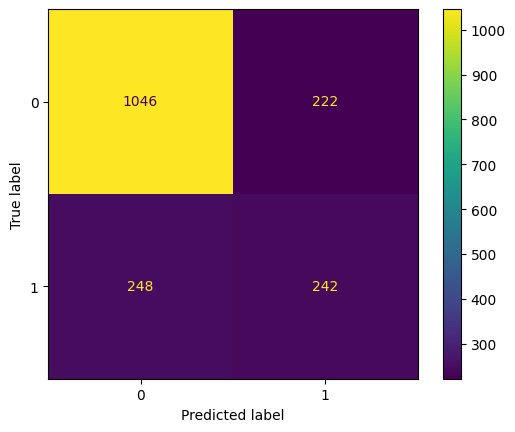

Test Data Accuracy: 0.7327


In [32]:
cm1 = confusion_matrix(Y_test, y_pred)
disp1=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model_tree.classes_)
disp1.plot()
plt.show()
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

Q. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.

Accuracy Score refers to the prediction of sum of  True Negative and True Positive predictions out of the total, which refers to the prediction capability of the algorithm.   A score of 0.7327 refers to that the algorithm predicts ~73% of the data to accurate churning/non churnings. Compared to Logistic Regression Model this Score is lesser and hence the prediction capability of the algorithm is also lower than logistic regression

accuracy: 0.732650739476678
precision score: 0.521551724137931
recall score: 0.49387755102040815
F1 Score: 0.5073375262054507

 Which model performs better? (Hint: compare the metrics)

In Logistic Regression a Probability model is applied and then segregation of classes is done (based on cutoff), whereas in Decision tree the classification is done on amount of impurity attached to a certain feature, features with lower impurity are placed higher in the tree and hence all further decisions are triggered accordingly. so in Decision tree dependency of Features is cyclic in nature, so in this problem Logistic regression model seems to be predicting better than decision tree. 

In [33]:
#Evaluating the Results
print("accuracy:", accuracy_score(Y_test, y_pred))
print("precision score:", precision_score(Y_test, y_pred))
print("recall score:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

accuracy: 0.732650739476678
precision score: 0.521551724137931
recall score: 0.49387755102040815
F1 Score: 0.5073375262054507


Training accuracy is 0.7639362912400455
Test accuracy is 0.7565415244596132


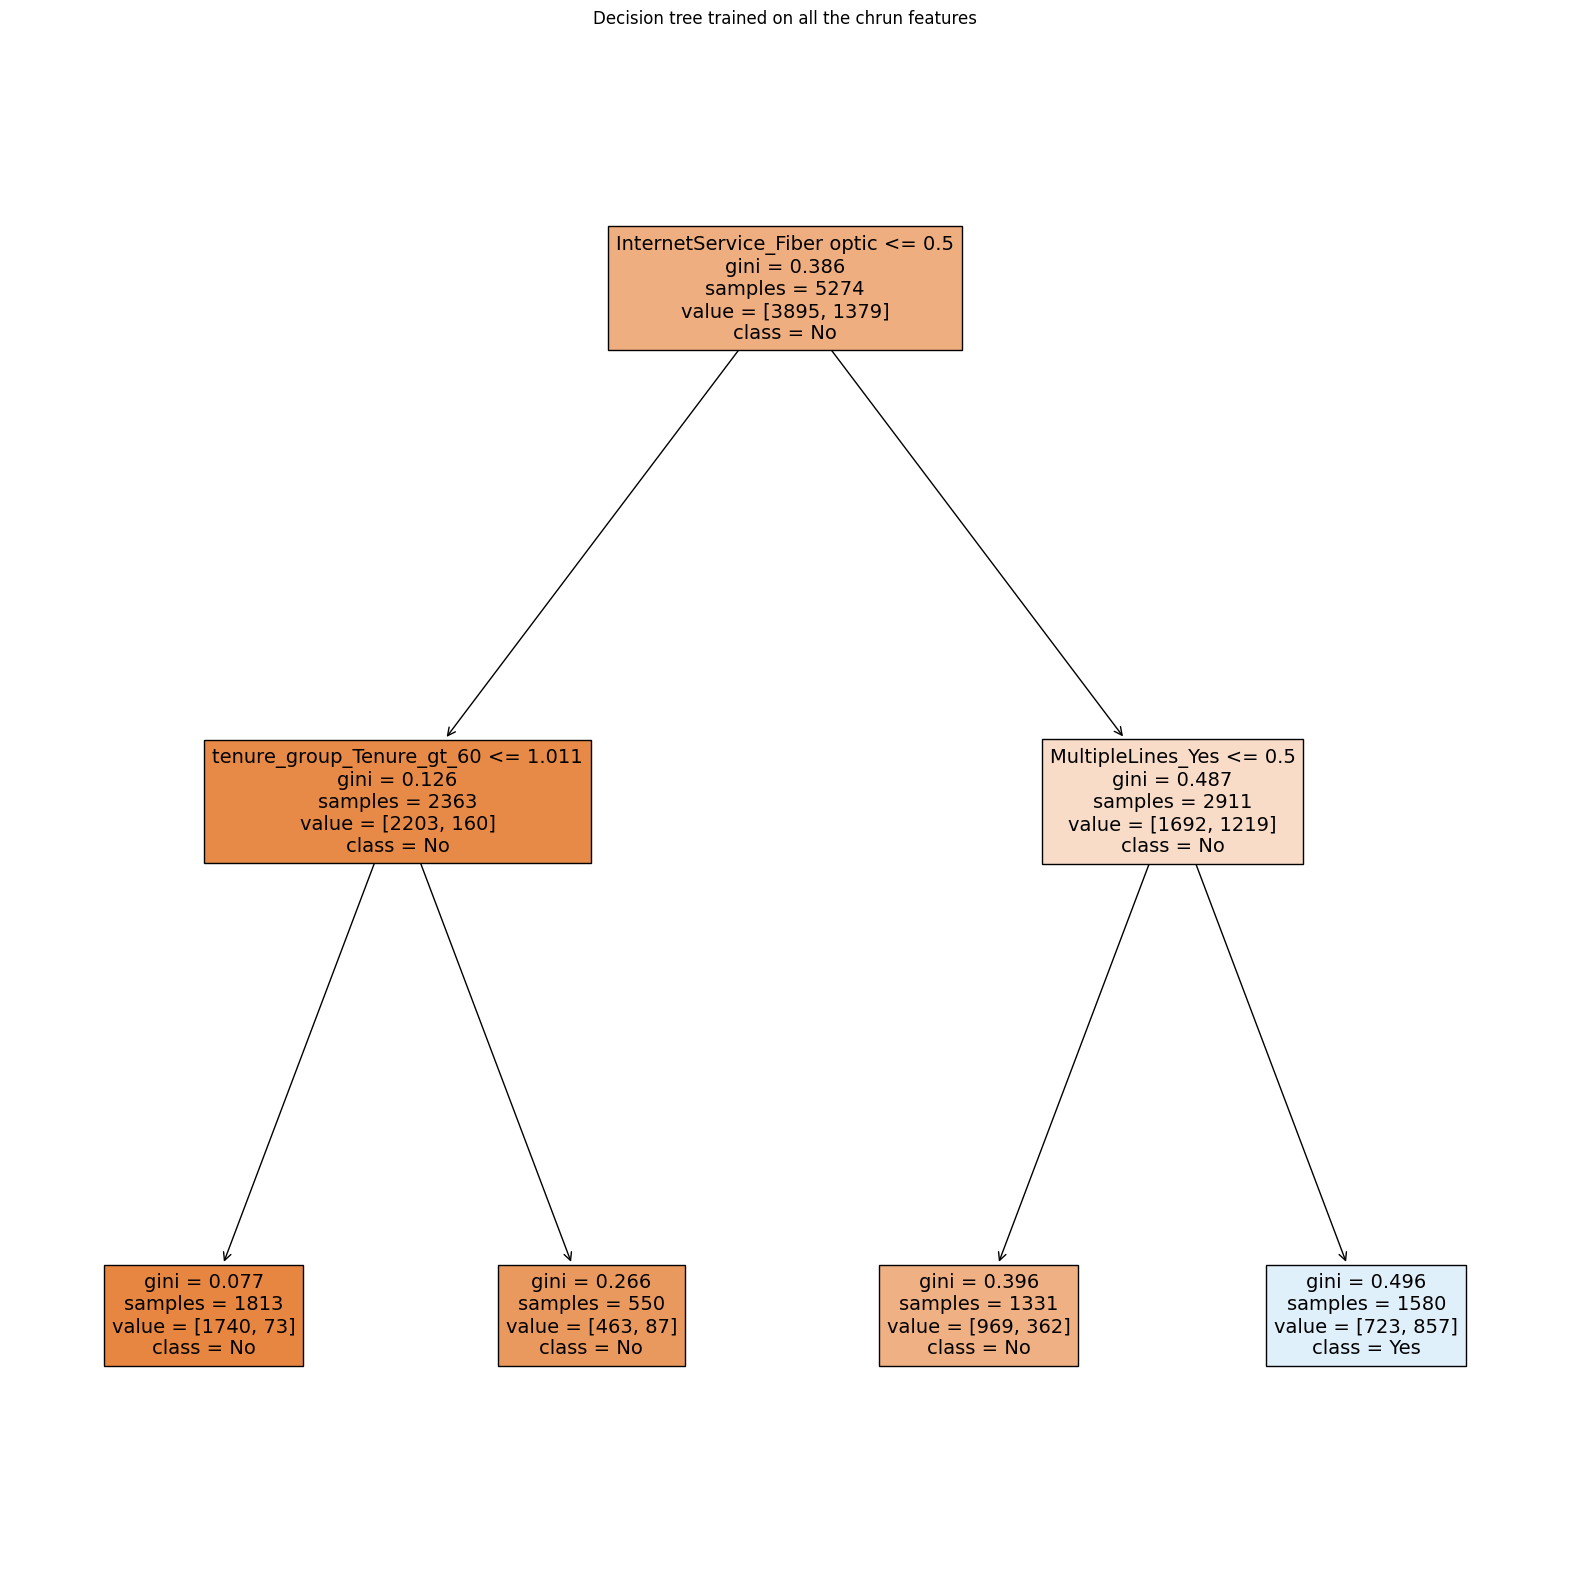

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=2)
tree1.fit(X_train,Y_train)

print("Training accuracy is {}".format(tree1.score(X_train, Y_train)))
print("Test accuracy is {}".format(tree1.score(X_test, Y_test)))
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plot_tree(tree1,feature_names=telcom.columns,class_names=["No","Yes"],filled=True)
plt.title("Decision tree trained on all the chrun features")
plt.show()

In [35]:
print("Feature importances:\n{}".format(model_tree.feature_importances_))

Feature importances:
[0.02347267 0.01967013 0.02453828 0.02107605 0.00125898 0.01893949
 0.01581823 0.02022419 0.01284025 0.00919376 0.01082888 0.01990221
 0.00809035 0.00127952 0.00698379 0.         0.05224384 0.00495974
 0.15893844 0.0014124  0.00373038 0.00542837 0.00866645 0.01736812
 0.00990437 0.         0.0040862  0.00570615 0.0023204  0.
 0.11798059 0.18885082 0.20428695]


<AxesSubplot:>

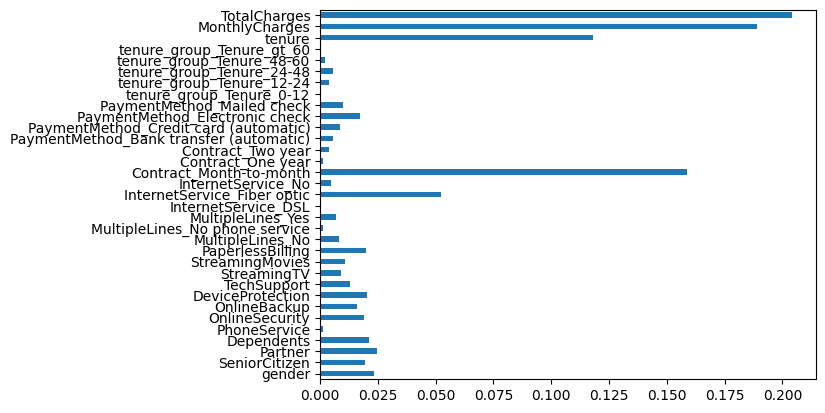

In [36]:
import pandas as pd
pd.Series(model_tree.feature_importances_,index=X_train.columns).plot(kind="barh")

K- fold Cross Validation

k-Fold Cross-Validation. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. In K Fold Cross validation model - the data is broken into multiple sets (K Value), these groups have even distribution of data in each group. this is done so that no data (classification category) is left out when we are training the model because this can affect the prediction capabilities of the algorithm  

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y =Y_train, cv =10)

In [38]:
# Check for accuracies
accuracies

array([0.80681818, 0.78219697, 0.82386364, 0.8219697 , 0.83301708,
       0.79316888, 0.78937381, 0.80075901, 0.80265655, 0.78937381])

Q. What do accuracies tell?

as with the validation procedure, whole data (test + train) was divided in 10 folds (with equal spread of classifications in features), this gives and additional edge to the algorithm while predicting as it is already trained with the test data. now if you see at the numbers Some of the sets /folds even have higher accuracy (~83%) than the whole one shot algorithm, while the lowest we got is equal to earlier numbers  (~79%). so by the validation technique a better spread is captured by the algorithm and hence in turn a better prediction model is achieved

In [39]:
# Analyzing Coefficients
coef=pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], 
                                                                              axis = 1)
coef

,features,Coef
0,gender,-0.089566
1,SeniorCitizen,0.215580
2,Partner,0.002618
3,Dependents,-0.132032
4,PhoneService,-0.178624
5,OnlineSecurity,-0.427250
6,OnlineBackup,-0.188926
7,DeviceProtection,-0.008707
8,TechSupport,-0.311266
9,StreamingTV,0.179637


In [60]:
DeepnoteChart(coef, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":{"order":"ascending","encoding":"y"},"type":"nominal","field":"features","scale":{"type":"linear","zero":false}},"y":{"sort":{"order":"ascending","encoding":"x"},"type":"quantitative","field":"Coef","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"quantitative","field":"Coef","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

looking at the above chart, some of the features like Tenure, Contract_monthly, contract_2 year etc. are some which have very high correlational values (+ve or -ve), hence these features impact the outcome of the algorithm in high percentage points , on the other hand features like Device protection, partner which have very small bars (~0) have the least impact on the prediction outcome of the model

Feature Selection/Feature Engineering

In [41]:
from sklearn.feature_selection import RFE 
classifier1 = LogisticRegression()
rfe=RFE(classifier1,n_features_to_select=10)
rfe=rfe.fit(X_train,Y_train)

In [42]:
print(rfe.support_)

[False False False False False  True False False False False  True False
  True False False False  True  True  True False  True False False False
 False False False False  True  True  True False False]


In [43]:
X_train.columns[rfe.support_]

Index(['OnlineSecurity', 'StreamingMovies', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'tenure'],
      dtype='object')

In [44]:
rfe.ranking_

array([18,  7, 24, 14, 15,  1, 11, 23,  5,  6,  1,  3,  1, 12, 16, 20,  1,
        1,  1, 21,  1, 22, 17,  4, 19,  8,  2,  9,  1,  1,  1, 13, 10])

In [45]:
# Build the model again after Feature Selection
classifier12 = LogisticRegression(random_state = 0)
classifier12.fit(X_train[X_train.columns[rfe.support_]], Y_train)

LogisticRegression(random_state=0)

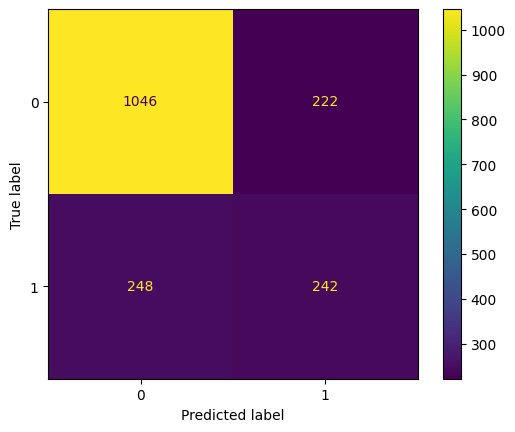

Test Data Accuracy: 0.7327


In [46]:
cm2 = confusion_matrix(Y_test, y_pred)
disp2=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=classifier12.classes_)
disp2.plot()
plt.show()
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

In [47]:
#Evaluating the Results
print("accuracy:", accuracy_score(Y_test, y_pred))
print("precision score:", precision_score(Y_test, y_pred))
print("recall score:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

accuracy: 0.732650739476678
precision score: 0.521551724137931
recall score: 0.49387755102040815
F1 Score: 0.5073375262054507


Q. Has the model improved after feature selection?

Compared to the earlier logistic regression scores (nearly all) the values have gone down, accuracy is down by 10%, precision and recall numbers have gone up pointing that the algorithm with lesser features (top 10) is somewhat less precise than the algorithm which had all features.  but still even with less features it is on par with Decision tree model (with all features in it)

New Model

accuracy: 0.732650739476678
precision score: 0.521551724137931
recall score: 0.49387755102040815
F1 Score: 0.5073375262054507

Old Model

accuracy: 0.8020477815699659
precision score: 0.6888297872340425
recall score: 0.5285714285714286
F1 Score: 0.5981524249422633

In [48]:
# Subset the coefficents for RFE
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], axis = 1)

,features,Coef
0,OnlineSecurity,-0.089566
1,StreamingMovies,0.215580
2,MultipleLines_No,0.002618
3,InternetService_Fiber optic,-0.132032
4,InternetService_No,-0.178624
5,Contract_Month-to-month,-0.427250
6,Contract_Two year,-0.188926
7,tenure_group_Tenure_48-60,-0.008707
8,tenure_group_Tenure_gt_60,-0.311266
9,tenure,0.179637


In [61]:
DeepnoteChart(coef, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":{"order":"ascending","encoding":"y"},"type":"nominal","field":"features","scale":{"type":"linear","zero":false}},"y":{"sort":{"order":"ascending","encoding":"y"},"type":"quantitative","field":"Coef","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"quantitative","field":"Coef","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [50]:
final_results = pd.concat([Y_test, telcom.customerID], axis =1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['customerID', 'Churn', 'predicted_churn']].reset_index(drop = True)

Q. Print the final Results

In [51]:
print(final_results)

      customerID  Churn  predicted_churn
0     3668-QPYBK    1.0                0
1     7795-CFOCW    0.0                1
2     9237-HQITU    1.0                0
3     8091-TTVAX    0.0                0
4     6865-JZNKO    0.0                1
...          ...    ...              ...
1753  2823-LKABH    0.0                1
1754  6894-LFHLY    1.0                0
1755  0639-TSIQW    1.0                0
1756  4801-JZAZL    0.0                0
1757  3186-AJIEK    0.0                0

[1758 rows x 3 columns]


Q. Provide recommendations based on the feature selection. What should company target for to reduce churn?

As per the feature selection model, the company should be focusing on the things which are causing a major churn in the company. The following are such factors:

1. High impacting Features such as  InternetService, Tenure , OnlineSecurity should be considered while preparing a marketing strategy for the company - The company should focus on upfront discounts and competitive monthly plans with bundled services which can attract a lot of Young people to the company. Youth have certain priorities - Money, Service and Security, if a bundled deal with low monthly charges, Better speed/service and high security is catered then there are chances that the company can cut down on its Churning numbers.  

undefined. Lower/No Impacting features like type of payments, device protections, multiple lines etc. should be given less focus by the company. these are kind of addons which impact/benefit the customer when they are in the system for a long time (in other words he/she is already loyal), so for a short term plan lets focus on customers which are churning. these services also doesn't contribute much to the churn rate thus proving that service, money and security are still the best things to invest for the company.

Practice Q. Can you Add SVM model to this dataset and perform the same steps and check test data accuracy?

In [52]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=2).fit(X_train,Y_train)
print((svc.score(X_train,Y_train)))
print((svc.score(X_test, Y_test)))

0.8067880166856276
0.7963594994311718


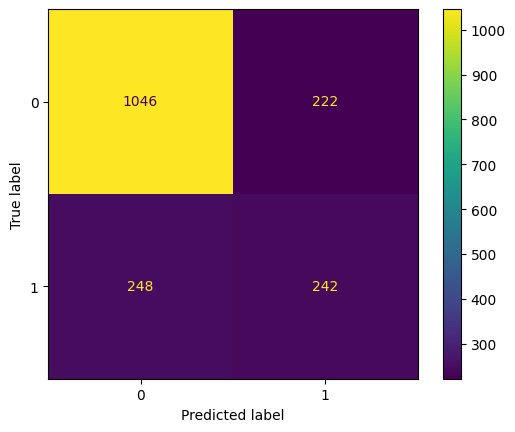

In [53]:
cm3 = confusion_matrix(Y_test, y_pred)
disp3=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=svc.classes_)
disp3.plot()
plt.show()

In [54]:
print(X_train.shape)
print(Y_train.shape)

(5274, 33)
(5274, 1)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf774db2-d69d-4c68-9d3d-54c7625b552d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>